## CVU Open and Reproducible Research Computing (Fall 2022)

### Assignment Notebook: Time Series Analysis

#### 1. Install the `bmi_nwis` library (if it's not installed already)

In [ ]:
!pip install bmi_nwis

#### 2. Import the libraries required for the assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dataretrieval.nwis as nwis

output_pkl_file = 'streamflow_data_'

#### 3a. Choose one of the following USGS stream gages to analyze

Uncomment __one__ of the following `site_id` variable declarations. Leave `my_start_date` and `my_end_date` unchanged. All of the sites below have at least 40 years of record. Only the Cache la Poudre has less than 50. 

In [2]:
# site_id = '13185000' # Boise River at Twin Springs
site_id = '13139510' # Big Wood River at Hailey
# site_id = '13246000' # North Fork of the Payette near Banks
# site_id = '13042500' # Henry's Fork Near Island Park
# site_id = '06752260' # Cache La Poudre River near Fort Collins (CO)
# site_id = '09085000' # Roaring Fork River at Glenwood Springs (CO)

my_start_date = '1970-10-01'
my_end_date = '2020-09-30'

#### 4. Get the Flow Data

In [4]:
df_flow = nwis.get_record(sites=site_id, service='dv', 
                          start=my_start_date, end=my_end_date)
df_flow

,00010_Maximum,00010_Maximum_cd,site_no,00010_Minimum,00010_Minimum_cd,00010_Mean,00010_Mean_cd,00060_Mean,00060_Mean_cd
datetime,,,,,,,,,
1970-10-01 00:00:00+00:00,NaN,NaN,13139510,NaN,NaN,NaN,NaN,254.0,A
1970-10-02 00:00:00+00:00,NaN,NaN,13139510,NaN,NaN,NaN,NaN,254.0,A
1970-10-03 00:00:00+00:00,NaN,NaN,13139510,NaN,NaN,NaN,NaN,254.0,A
1970-10-04 00:00:00+00:00,NaN,NaN,13139510,NaN,NaN,NaN,NaN,245.0,A
1970-10-05 00:00:00+00:00,NaN,NaN,13139510,NaN,NaN,NaN,NaN,245.0,A
...,...,...,...,...,...,...,...,...,...
2020-09-26 00:00:00+00:00,NaN,NaN,13139510,NaN,NaN,NaN,NaN,117.0,A
2020-09-27 00:00:00+00:00,NaN,NaN,13139510,NaN,NaN,NaN,NaN,121.0,A
2020-09-28 00:00:00+00:00,NaN,NaN,13139510,NaN,NaN,NaN,NaN,121.0,A


#### 5. Plot the Data

Text(0, 0.5, 'Discharge (ft${}^3$/s)')

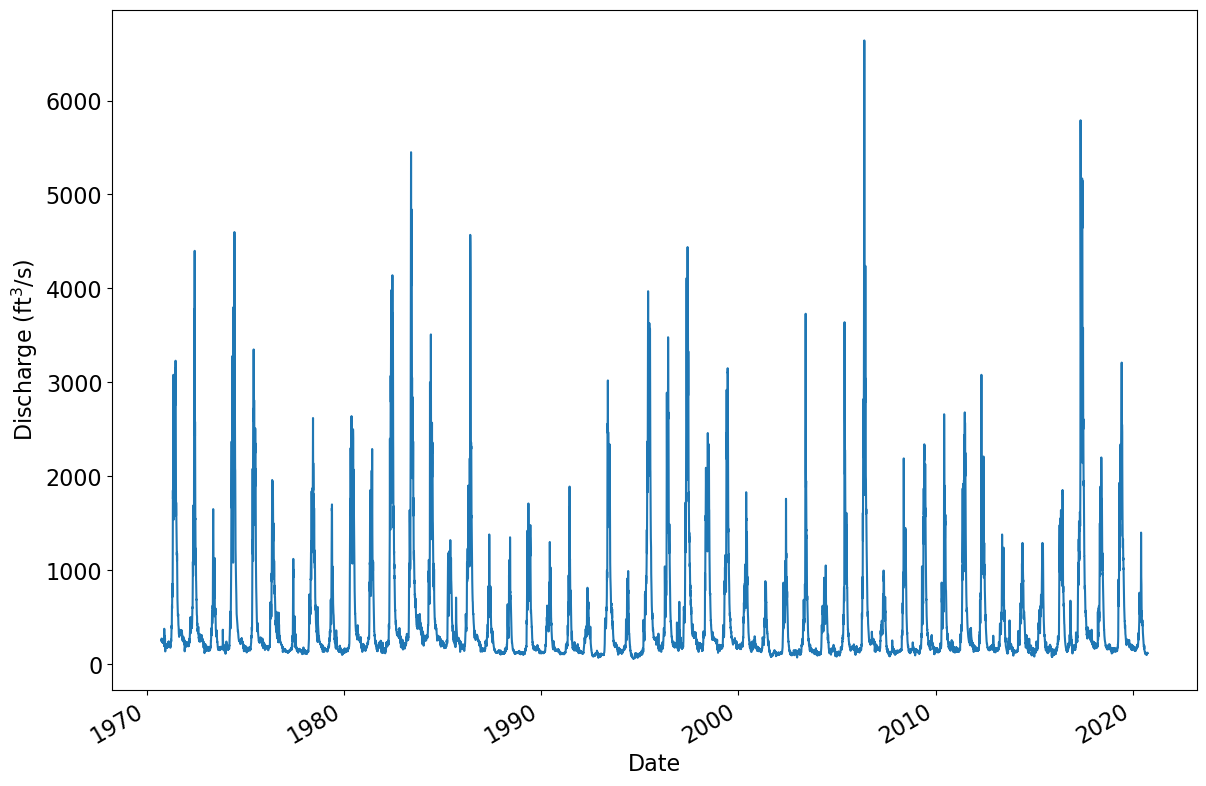

In [5]:
plt.rcParams.update({'font.size': 16})

ax1 = df_flow['00060_Mean'].plot(x='datetime', figsize=(14,10))

ax1.set_xlabel('Date')
ax1.set_ylabel('Discharge (ft${}^3$/s)')

#### 6. Wrangle the Data into a `pandas` DataFrame object

Steps: 
* Get the dates and streamflow out of the object returned by our call to `Nwis.nwis()`
* Convert the streamflow in ft${}^3$/s to m${}^3$/s
* Create a water year vector so we can analyze data by water year
* Create a `pandas.DataFrame()` with the data

In [9]:
# Get the dates and convert them to a Pandas datetime object
dates = df_flow.index
dates = pd.DatetimeIndex(dates) 

# Get the streamflow in ft^3/s as a numerical array and create one that is the same values but in m^3/s
Q_cfs = df_flow['00060_Mean'].values
Q_cms = Q_cfs / (3.2808**3)

# Create a water year vector by getting the year for every streamflow observation, checking the 
# associated month of that observation and then – if that month is October (10) or onward – add
# 1 to the water year
WY = df_flow.index.year.values
WY[dates.month>=10] += 1

# Create a pandas DataFrame from these variables
df = pd.DataFrame()
df['Dates'] = dates
df['WaterYear'] = WY
df['Discharge_cfs'] = Q_cfs
df['Discharge_cms'] = Q_cms

# Rebuild the index to be able to use the pd.DataFrame.groupby() method
df.index = pd.to_datetime(df['Dates'],'%y-%m-%d')

# Save to a pickle file
# Question: What's going on with the file name? serializes a np array
df.to_pickle(output_pkl_file+site_id+'.pkl')

# Show the dataframe we've created
df

,Dates,WaterYear,Discharge_cfs,Discharge_cms
Dates,,,,
1970-10-01 00:00:00+00:00,1970-10-01 00:00:00+00:00,1971,254.0,7.192741
1970-10-02 00:00:00+00:00,1970-10-02 00:00:00+00:00,1971,254.0,7.192741
1970-10-03 00:00:00+00:00,1970-10-03 00:00:00+00:00,1971,254.0,7.192741
1970-10-04 00:00:00+00:00,1970-10-04 00:00:00+00:00,1971,245.0,6.937881
1970-10-05 00:00:00+00:00,1970-10-05 00:00:00+00:00,1971,245.0,6.937881
...,...,...,...,...
2020-09-26 00:00:00+00:00,2020-09-26 00:00:00+00:00,2020,117.0,3.313192
2020-09-27 00:00:00+00:00,2020-09-27 00:00:00+00:00,2020,121.0,3.426463
2020-09-28 00:00:00+00:00,2020-09-28 00:00:00+00:00,2020,121.0,3.426463


#### 7. Compute the Seasonal Cycle and Plot

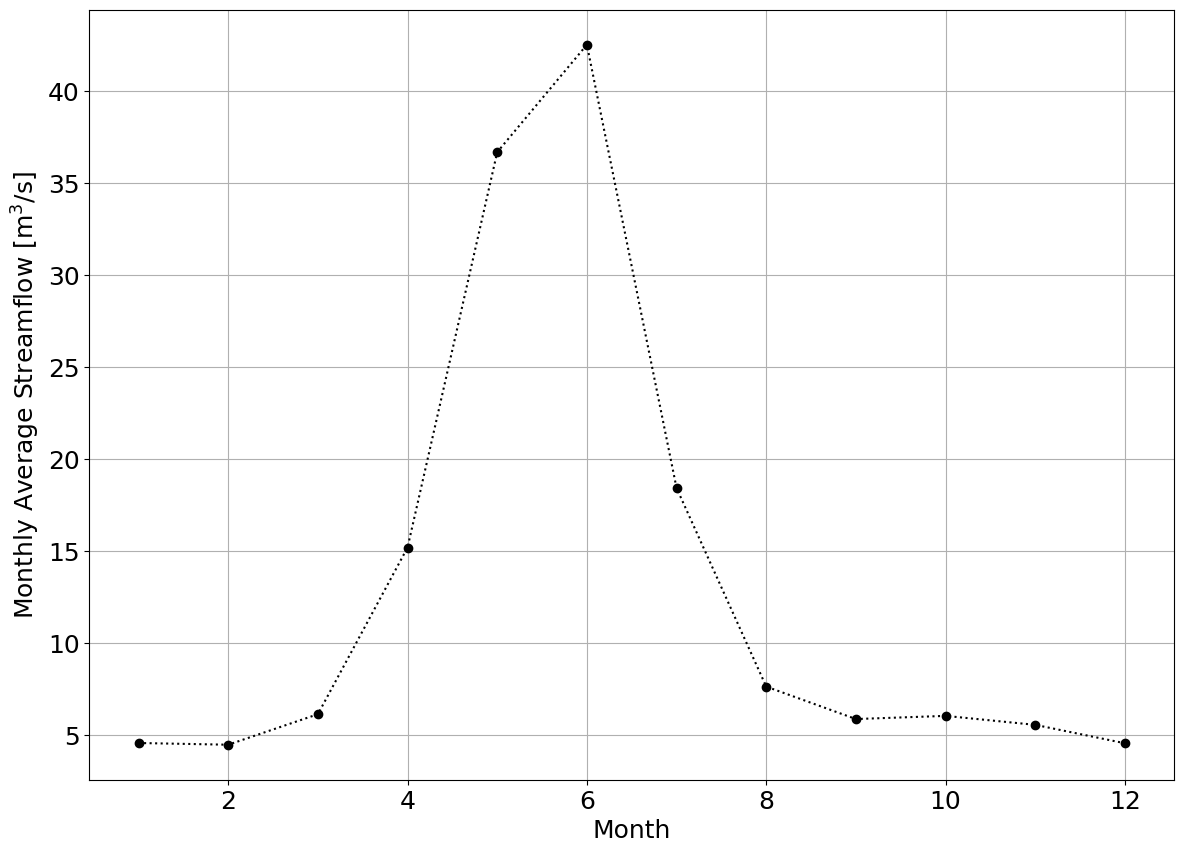

In [8]:
q_seasonal = df['Discharge_cms'].groupby(by=df.index.month).mean().values

plt.figure(figsize=(14,10))
plt.rcParams.update({'font.size': 18}) # Increase the font size
plt.plot((np.arange(q_seasonal.size)+1),q_seasonal,'ko:')
plt.xlabel('Month')
plt.ylabel('Monthly Average Streamflow [m${}^3$/s]')
plt.grid()
plt.show()

## Instructions
---

1. Download this notebook into the folder for your repository for this module by opening a terminal window, navigating to your repository folder and issuing the command `curl -OL https://raw.githubusercontent.com/LejoFlores/OpenResearchComputing/main/mod02/mod02_assignment.ipynb`. Or, [click on this link](https://raw.githubusercontent.com/LejoFlores/OpenResearchComputing/main/mod02/mod02_assignment.ipynb) and save the page to your local repository.  
2. Verify that the notebook runs to this point 
3. Go back and change the `site_id` variable to a gage of your choosing by commenting out the current gage selected and uncommenting the gage you would like to investigate. Then in the Jupyter Lab menu go to "Kernel > Restart Kernel and Clear All Outputs" and click "Restart" when prompted
4. Re-run the notebook to this point
5. Now group the streamflow data by `WaterYear` and get the maximum streamflow value for each Water Year. You will need to use the `.groupby()` followed by the `.max()` methods. This should be very similar to the commands used to find the seasonal cycle above, but be sure to make sure to group by Water Year! Store the output of that operation in a variable called `Q_ams`. Print the output of `Q_ams` to see which years were associated with the lowest 5 and highest 5 annual maximum streamflows. __Note:__ See this [DataFrame.groupby()](https://www.geeksforgeeks.org/pandas-groupby/) and [DataFrame.max()](https://www.geeksforgeeks.org/python-pandas-dataframe-max/) documentation for help. 
6. Now sort the annual maximum series in ___descending order___ using the `.sort_values()` method. Use the `.values` to save these values to a numpy array. __Note:__ See this [DataFrame.sort_values()](https://www.geeksforgeeks.org/python-pandas-dataframe-sort_values-set-1/) and [DataFrame.values](https://www.geeksforgeeks.org/python-pandas-dataframe-values/) documentation for help. 
7. Compute the Weibull plotting position value for each streamflow value. The Weibull series is calculated using the formula:

    $$
    p_i = \frac{r_i}{n+1},
    $$

    where $r_i$ is the rank of the $i$th observation, $n$ is the number of annual maximum observations, and $p_i$ is the exceedance probability. Use the numpy command `np.arange()` method and the `.size` attribute on your annual maximum series array to create an array of ranks associated with each annual maximum value.
8. Create a presentation quality plot showing the annual maximum streamflows on the x-axis and the exceedance probability on the y axis. __Note:__ See this [numpy.arange()](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) and [numpy.size()](https://numpy.org/doc/stable/reference/generated/numpy.broadcast.size.html) documentation for help. 
9. The $T$-year recurrence interval is associated with an exceedance probability of $p$ which is calculated using:

    $$ 
    p = \frac{1}{T} 
    $$

    Calculate the values of the 20- and 50- year recurrence interval events directly from the Weibull plotting position values by using the numpy `np.interp()` function, which does a very basic interpolation (there are more sophisticated ones, but this is sufficient for now). __Note:__ See this [numpy.interp()](https://www.geeksforgeeks.org/numpy-interp-function-python/) documentation for help.  

In [34]:
#Grouping by water year
#Q_ams = df['Discharge_cms'].groupby(by=df.index.year).max().values .Values turnes it into array
Q_ams = df['Discharge_cms'].groupby(by=df.WaterYear).max()
Q_ams

WaterYear
1971     91.466751
1972    124.598670
1973     46.724501
1974    130.262246
1975     94.864897
1976     55.503044
1977     31.716025
1978     74.192845
1979     48.140395
1980     74.759202
1981     64.847944
1982    117.236022
1983    154.332444
1984     99.395757
1985     37.379601
1986    129.412710
1987     39.078674
1988     38.229137
1989     48.423574
1990     36.813244
1991     53.520792
1992     23.022436
1993     85.519996
1994     28.063019
1995    112.421982
1996     98.546221
1997    125.731385
1998     69.661984
1999     89.201321
2000     51.821720
2001     25.004688
2002     49.839468
2003    105.625691
2004     29.733774
2005    103.077082
2006    188.030721
2007     28.204608
2008     62.016156
2009     66.263838
2010     75.325560
2011     75.891917
2012     87.219069
2013     39.078674
2014     36.530065
2015     36.530065
2016     52.388077
2017    163.960523
2018     62.299335
2019     90.900394
2020     39.645031
Name: Discharge_cms, dtype: float64

In [39]:
Q_ams_sort = Q_ams.sort_values(ascending=False).values
Q_ams_sort

array([188.03072065, 163.96052297, 154.33244391, 130.26224623,
       129.41270984, 125.73138549, 124.59867031, 117.23602161,
       112.42198207, 105.62569097, 103.0770818 ,  99.39575745,
        98.54622106,  94.86489671,  91.46675116,  90.90039357,
        89.20132079,  87.21906922,  85.51999644,  75.89191737,
        75.32555978,  74.75920219,  74.19284459,  69.66198385,
        66.2638383 ,  64.84794432,  62.29933515,  62.01615636,
        55.50304405,  53.52079247,  52.38807729,  51.8217197 ,
        49.83946812,  48.42357414,  48.14039535,  46.72450137,
        39.64503146,  39.07867387,  39.07867387,  38.22913748,
        37.37960109,  36.8132435 ,  36.5300647 ,  36.5300647 ,
        31.71602517,  29.7337736 ,  28.2046081 ,  28.0630187 ,
        25.0046877 ,  23.02243613])

In [35]:
#Another way to sort
#Q_ams_sort = np.sort(Q_ams)
#Q_ams_sort

array([ 23.02243613,  25.0046877 ,  28.0630187 ,  28.2046081 ,
        29.7337736 ,  31.71602517,  36.5300647 ,  36.5300647 ,
        36.8132435 ,  37.37960109,  38.22913748,  39.07867387,
        39.07867387,  39.64503146,  46.72450137,  48.14039535,
        48.42357414,  49.83946812,  51.8217197 ,  52.38807729,
        53.52079247,  55.50304405,  62.01615636,  62.29933515,
        64.84794432,  66.2638383 ,  69.66198385,  74.19284459,
        74.75920219,  75.32555978,  75.89191737,  85.51999644,
        87.21906922,  89.20132079,  90.90039357,  91.46675116,
        94.86489671,  98.54622106,  99.39575745, 103.0770818 ,
       105.62569097, 112.42198207, 117.23602161, 124.59867031,
       125.73138549, 129.41270984, 130.26224623, 154.33244391,
       163.96052297, 188.03072065])

In [41]:
n = np.size(Q_ams_sort)
r = np.arange(n)+1

p_ams = r/(n+1)
p_ams

array([0.01960784, 0.03921569, 0.05882353, 0.07843137, 0.09803922,
       0.11764706, 0.1372549 , 0.15686275, 0.17647059, 0.19607843,
       0.21568627, 0.23529412, 0.25490196, 0.2745098 , 0.29411765,
       0.31372549, 0.33333333, 0.35294118, 0.37254902, 0.39215686,
       0.41176471, 0.43137255, 0.45098039, 0.47058824, 0.49019608,
       0.50980392, 0.52941176, 0.54901961, 0.56862745, 0.58823529,
       0.60784314, 0.62745098, 0.64705882, 0.66666667, 0.68627451,
       0.70588235, 0.7254902 , 0.74509804, 0.76470588, 0.78431373,
       0.80392157, 0.82352941, 0.84313725, 0.8627451 , 0.88235294,
       0.90196078, 0.92156863, 0.94117647, 0.96078431, 0.98039216])

Text(0.5, 1.0, 'Annual Maximum Flow Series at Big Wood River at Hailey')

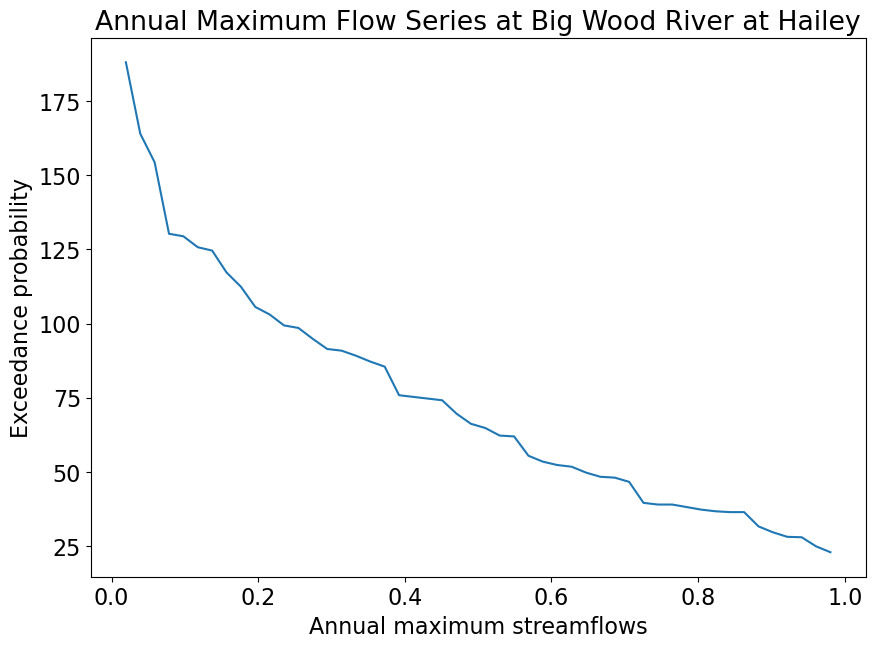

In [47]:
plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 16})
plt.plot(p_ams,Q_ams_sort)
plt.xlabel('Annual maximum streamflows')
plt.ylabel('Exceedance probability')
plt.title('Annual Maximum Flow Series at Big Wood River at Hailey')


In [42]:
Q20 = np.interp((1/20),p_ams, Q_ams_sort)
Q50 = np.interp((1/50),p_ams, Q_ams_sort)

In [43]:
print('The 20-year flood event has a magnitude of {:.3f} m^3/s'.format(Q20))
print('The 50-year flood event has a magnitude of {:.3f} m^3/s'.format(Q50))

The 20-year flood event has a magnitude of 158.665 m^3/s
The 50-year flood event has a magnitude of 187.549 m^3/s
